<a href="https://colab.research.google.com/github/Kremmydasalexandros/datastories_for_emme/blob/main/%CE%93%CE%A5%CE%9D%CE%91%CE%99%CE%9A%CE%9F%CE%9A%CE%A4%CE%9F%CE%9D%CE%99%CE%91_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 24.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [126]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [128]:
df = pd.read_csv("/content/gdrive/MyDrive/sentimentanalysis2.csv>")

In [129]:
df


,level_0,index,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg,(-)αρνητικότητα | θετικότητα(+)
0,0,0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6,3.0
1,1,1,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,17,7,0,5,0,2,6,17,3,9,0,7,10,41.0
2,2,2,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,23,35,28,10,15,33,2,23,5,20,15,35,-12,-21.0
3,3,3,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,5,5,4,3,3,5,1,5,5,1,5,5,0,0.0
4,4,4,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,49,27,14,16,8,17,7,49,8,34,9,27,22,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,1431,Τροιζήνα: Παιδί σκοτώθηκε στο φαράγγι Διαβολογ...,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...,5,5,1,4,3,5,4,5,0,3,2,5,0,0.0
1432,1432,1432,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,5,0,0,2,0,0,3,5,0,4,1,0,5,100.0
1433,1433,1433,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,19,14,5,5,3,4,7,19,1,9,5,14,5,15.0
1434,1434,1434,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",10,20,11,14,3,17,4,10,7,7,15,20,-10,-33.0


In [130]:
nlp = spacy.load('el_core_news_sm')

In [131]:
emotion_words_df = pd.read_csv("/content/gdrive/MyDrive/sentimentanalysis3.csv>")
emotion_words_df.tail(1)

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg,(-)αρνητικότητα | θετικότητα(+)
1435,Ιταλία: Παράνομος αλλοδαπός βίασε και σκότωσε ...,Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...,13,17,13,7,10,16,3,13,6,8,12,17,-4,-13.0


In [132]:
df = pd.read_csv("/content/gdrive/MyDrive/sentimentanalysis3.csv>")
df.tail(1)

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg,(-)αρνητικότητα | θετικότητα(+)
1435,Ιταλία: Παράνομος αλλοδαπός βίασε και σκότωσε ...,Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...,13,17,13,7,10,16,3,13,6,8,12,17,-4,-13.0


In [133]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emotion_words_df['title'].tolist(), # Access the 'title' column as a list
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [134]:
# Remove duplicates from the vocabulary
unique_vocab = list(set(emotion_words_df['title'].tolist()))

vec = CountVectorizer(analyzer = 'word', vocabulary = unique_vocab, # Use the unique vocabulary
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [135]:
emo_df = df.copy()

In [136]:
emo_df

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg,(-)αρνητικότητα | θετικότητα(+)
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6,3.0
1,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,17,7,0,5,0,2,6,17,3,9,0,7,10,41.0
2,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,23,35,28,10,15,33,2,23,5,20,15,35,-12,-21.0
3,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,5,5,4,3,3,5,1,5,5,1,5,5,0,0.0
4,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,49,27,14,16,8,17,7,49,8,34,9,27,22,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Τροιζήνα: Παιδί σκοτώθηκε στο φαράγγι Διαβολογ...,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...,5,5,1,4,3,5,4,5,0,3,2,5,0,0.0
1432,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,5,0,0,2,0,0,3,5,0,4,1,0,5,100.0
1433,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,19,14,5,5,3,4,7,19,1,9,5,14,5,15.0
1434,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",10,20,11,14,3,17,4,10,7,7,15,20,-10,-33.0


In [137]:
print(emotion_words_df.columns)

Index(['title', 'text', 'positivity', 'negativity', 'anger', 'anticipation',
       'disgust', 'fear', 'joy', 'positive', 'surprise', 'trust', 'sadness',
       'negative', 'pos/neg', '(-)αρνητικότητα | θετικότητα(+)'],
      dtype='object')


In [138]:
df.anger

0       82
1        0
2       28
3        4
4       14
        ..
1431     1
1432     0
1433     5
1434    11
1435    13
Name: anger, Length: 1436, dtype: int64

In [139]:
max_anger_index = df['anger'].idxmax()
article_with_max_anger = df.loc[max_anger_index]
print(article_with_max_anger)


title                              Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...
text                               Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
positivity                                                                       106
negativity                                                                       100
anger                                                                             82
anticipation                                                                      49
disgust                                                                           45
fear                                                                              62
joy                                                                               39
positive                                                                         106
surprise                                                                          28
trust                                                            

In [140]:
anger_df = df.head(1)

In [141]:
anger_df

,title,text,positivity,negativity,anger,anticipation,disgust,fear,joy,positive,surprise,trust,sadness,negative,pos/neg,(-)αρνητικότητα | θετικότητα(+)
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",106,100,82,49,45,62,39,106,28,67,45,100,6,3.0


In [142]:
anger_df.text

0    Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
Name: text, dtype: object

In [143]:
print(anger_df.text)

0    Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
Name: text, dtype: object


In [144]:
print(anger_df['text'].head(1))

0    Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
Name: text, dtype: object


In [145]:
#!pip install wordcloud




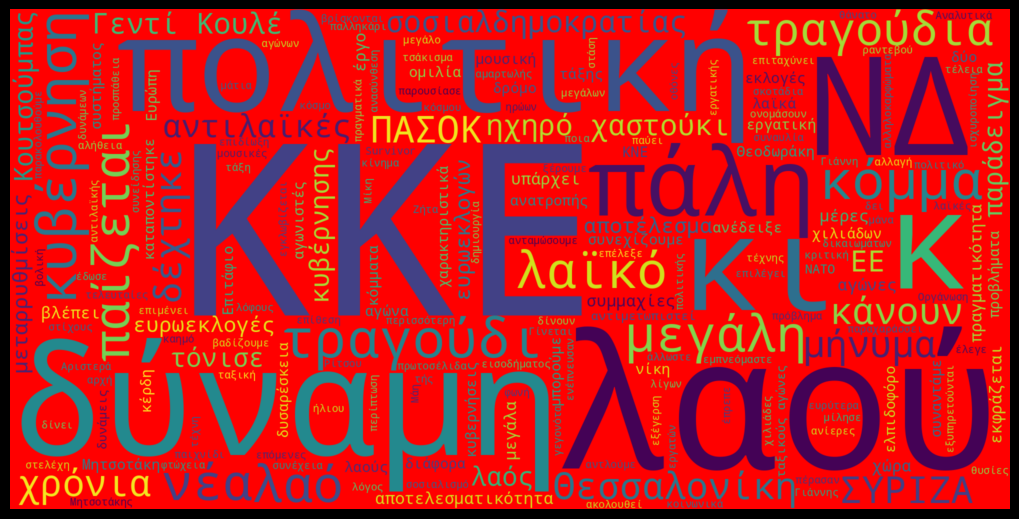

In [149]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text' column in anger_df contains the text
text = ' '.join(anger_df['text'].astype(str)) # Join all text entries into a single string

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'red'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [155]:
# Try printing the first few rows of your DataFrame to inspect the index values
print(anger_df.head())

# If the first index is not 0, adjust accordingly. For example, if it starts at 1:
doc = nlp(anger_df['text'][0])  # Access the element at index 1

# Alternatively, if you want to process all text entries, you can iterate over the DataFrame:
for index, row in anger_df.iterrows():
    doc = nlp(row['text'])
    # Perform your NLP operations on 'doc' here

                                               title  \
0  Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...   

                                                text  positivity  negativity  \
0  Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...         106         100   

   anger  anticipation  disgust  fear  joy  positive  surprise  trust  \
0     82            49       45    62   39       106        28     67   

   sadness  negative  pos/neg  (-)αρνητικότητα | θετικότητα(+)  
0       45       100        6                              3.0  


In [156]:
for token in doc:
    print(token, token.lemma_)

Στη σε ο
Θεσσαλονίκη Θεσσαλονίκη
, ,
στο σε ο
Θέατρο Θέατρο
Γης Γης
, ,
στην σε ο
μεγάλη μεγάλος
συναυλία συναυλία
– –
αφιέρωμα αφιέρωμα
στο σε ο
πολιτικό πολιτικός
τραγούδι τραγούδις
την ο
οποία οποίος
διοργάνωσε διοργάνωσε
η ο
Κομματική κομματικός
Οργάνωση οργάνωση
της ο
Κεντρικής κεντρικός
Μακεδονίας Μακεδονία
του ο
ΚΚΕ ΚΚΕ
, ,
παραβρέθηκε παραβρέθηκε
ο ο
γενικός γενικός
γραμματέας γραμματέας
της ο
Κ.Ε Κ.Ε
του ο
ΚΚΕ ΚΚΕ
Δημήτρης Δημήτρης
Κουτσούμπας κουτσούμπας
. .
Στην σε ο

 

συναυλία συναυλία
, ,
με με
τίτλο τίτλο
τους ο
στίχους στίχος
του ο
Γιάννη Γιάννης
Ρίτσου Ρίτσου
« «
Κάποτε Κάποτε
θ’ θ’
ανταμώσουμε ανταμώζω
στους σε ο
λόφους λόφος
του ο
ήλιου ήλιος
. .
Μην μην
ξεχνάς ξεχνάςς
. .
Περπάτα περπάτα
» »
, ,
συμμετείχαν συμμετέχω
οι ο
ερμηνεύτριες ερμηνεύτρια
Μαρία Μαρία
Φαραντούρη Φαραντούρη
και και
Φωτεινή Φωτεινή
Βελεσιώτου Βελεσιώτου
. .

 

« «
Τα ο
σημερινά σημερινός
μέλη μέλος
και και
στελέχη στελέχη
του ο
ΚΚΕ ΚΚΕ
και και
της ο
ΚΝΕ ΚΝΕ
αντλούμε αντλώ
δύναμη δύναμη
, ,
εμ

In [158]:
anger_df['text'][0]

'Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη συναυλία – αφιέρωμα στο πολιτικό τραγούδι την οποία διοργάνωσε η Κομματική Οργάνωση της Κεντρικής Μακεδονίας του ΚΚΕ, παραβρέθηκε ο γενικός γραμματέας της Κ.Ε του ΚΚΕ Δημήτρης Κουτσούμπας. Στην\nσυναυλία, με τίτλο τους στίχους του Γιάννη Ρίτσου «Κάποτε θ’ ανταμώσουμε στους λόφους του ήλιου. Μην ξεχνάς. Περπάτα», συμμετείχαν οι ερμηνεύτριες Μαρία Φαραντούρη και Φωτεινή Βελεσιώτου.\n«Τα σημερινά μέλη και στελέχη του ΚΚΕ και της ΚΝΕ αντλούμε δύναμη, εμπνεόμαστε από το παράδειγμα αυτών των χιλιάδων ηρώων που ανέδειξε ο λαός μας και συνεχίζουμε να βαδίζουμε τον δρόμο της ανατροπής μέχρι την νίκη, τον σοσιαλισμό», τόνισε μεταξύ άλλων ο κ. Κουτσούμπας στην ομιλία του.\nΟ κ. Κουτσούμπας προσέδωσε και πολιτικό χαρακτήρα στην ομιλία του εξαπολύοντας επίθεση κατά της κυβέρνησης και των υπολοίπων κομμάτων της Αντιπολίτευσης\n. «Τα τελευταία χρόνια ο ΣΥΡΙΖΑ, το ΠΑΣΟΚ, η Νέα Αριστερά και άλλοι με τη βολική τους στάση και κριτική, σε όλες τις κρίσιμες φάσ

In [159]:
' '.join(token.lemma_ for token in doc)

'σε ο Θεσσαλονίκη , σε ο Θέατρο Γης , σε ο μεγάλος συναυλία – αφιέρωμα σε ο πολιτικός τραγούδις ο οποίος διοργάνωσε ο κομματικός οργάνωση ο κεντρικός Μακεδονία ο ΚΚΕ , παραβρέθηκε ο γενικός γραμματέας ο Κ.Ε ο ΚΚΕ Δημήτρης κουτσούμπας . σε ο \n συναυλία , με τίτλο ο στίχος ο Γιάννης Ρίτσου « Κάποτε θ’ ανταμώζω σε ο λόφος ο ήλιος . μην ξεχνάςς . περπάτα » , συμμετέχω ο ερμηνεύτρια Μαρία Φαραντούρη και Φωτεινή Βελεσιώτου . \n « ο σημερινός μέλος και στελέχη ο ΚΚΕ και ο ΚΝΕ αντλώ δύναμη , εμπνεόμαστε από ο παράδειγμα αυτός ο χιλιάδα ηρώων που ανέδειξε ο λαός μου και συνεχίζω να βαδίζουμε ο δρόμος ο ανατροπή μέχρι ο νίκη , ο σοσιαλισμός » , τονίζω μεταξύ άλλος ο κ. Κουτσούμπας σε ο ομιλία μου . \n ο κ. Κουτσούμπας προσέδωσε και πολιτικός χαρακτήρας σε ο ομιλία ο εξαπολύοντα επίθεση κατά ο κυβέρνηση και ο υπολοίπων κόμμα ο αντιπολίτευση \n . « ο τελευταίος χρόνος ο ΣΥΡΙΖΑ , ο ΠΑΣΟΚ , ο νέος Αριστερά και άλλος με ο βολικός μου στάση και κριτική , σε όλος ο κρίσιμος φάση , έβγαζαν ο κυβέρνηση 

In [160]:
text

'Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη συναυλία – αφιέρωμα στο πολιτικό τραγούδι την οποία διοργάνωσε η Κομματική Οργάνωση της Κεντρικής Μακεδονίας του ΚΚΕ, παραβρέθηκε ο γενικός γραμματέας της Κ.Ε του ΚΚΕ Δημήτρης Κουτσούμπας. Στην\nσυναυλία, με τίτλο τους στίχους του Γιάννη Ρίτσου «Κάποτε θ’ ανταμώσουμε στους λόφους του ήλιου. Μην ξεχνάς. Περπάτα», συμμετείχαν οι ερμηνεύτριες Μαρία Φαραντούρη και Φωτεινή Βελεσιώτου.\n«Τα σημερινά μέλη και στελέχη του ΚΚΕ και της ΚΝΕ αντλούμε δύναμη, εμπνεόμαστε από το παράδειγμα αυτών των χιλιάδων ηρώων που ανέδειξε ο λαός μας και συνεχίζουμε να βαδίζουμε τον δρόμο της ανατροπής μέχρι την νίκη, τον σοσιαλισμό», τόνισε μεταξύ άλλων ο κ. Κουτσούμπας στην ομιλία του.\nΟ κ. Κουτσούμπας προσέδωσε και πολιτικό χαρακτήρα στην ομιλία του εξαπολύοντας επίθεση κατά της κυβέρνησης και των υπολοίπων κομμάτων της Αντιπολίτευσης\n. «Τα τελευταία χρόνια ο ΣΥΡΙΖΑ, το ΠΑΣΟΚ, η Νέα Αριστερά και άλλοι με τη βολική τους στάση και κριτική, σε όλες τις κρίσιμες φάσ

In [161]:
full_doc = nlp(text)

In [162]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [163]:
clear_text[200:400]

'ο Κ.Ε ο ΚΚΕ Δημήτρης κουτσούμπας . σε ο \n συναυλία , με τίτλο ο στίχος ο Γιάννης Ρίτσου « Κάποτε θ’ ανταμώζω σε ο λόφος ο ήλιος . μην ξεχνάςς . περπάτα » , συμμετέχω ο ερμηνεύτρια Μαρία Φαραντούρη και'

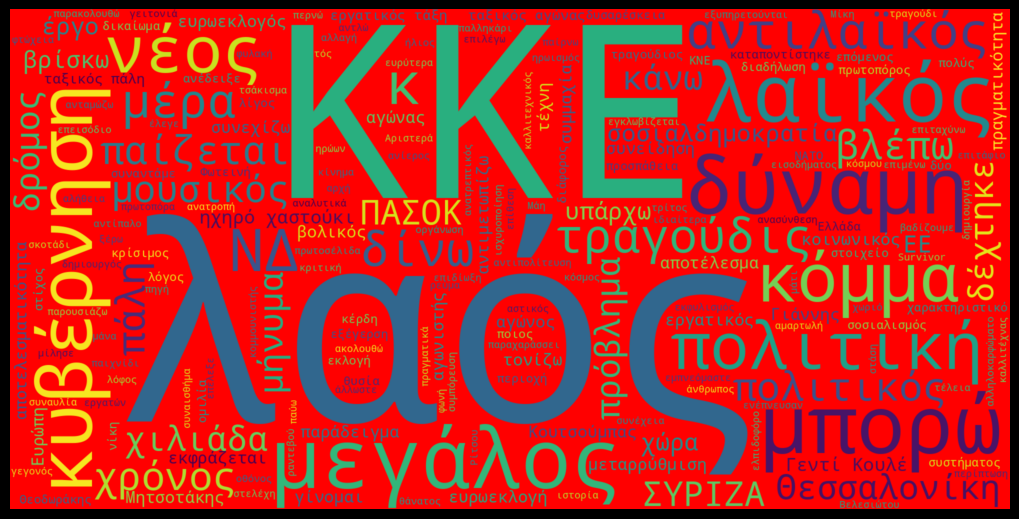

In [165]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'red'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()